In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io

In [8]:
paviaU = scipy.io.loadmat('./PaviaU.mat')['paviaU']
paviaU_gt = scipy.io.loadmat('./PaviaU_gt.mat')['paviaU_gt']

In [17]:
paviaU.shape

(610, 340, 103)

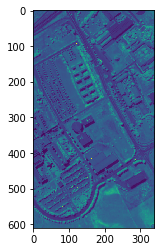

In [16]:
plt.imshow(paviaU[:,:,100])

In [18]:
from sklearn.decomposition import PCA

In [20]:
paviaU.max()

8000

In [22]:
Nmax = paviaU.max()
paviaU = paviaU/Nmax

In [23]:
paviaU = paviaU.reshape(610*340, 103)

In [511]:
pca = PCA(3)
paviaU_PCA = pca.fit_transform(paviaU)

In [510]:
paviaU_PCA = paviaU_PCA.reshape((610,340,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


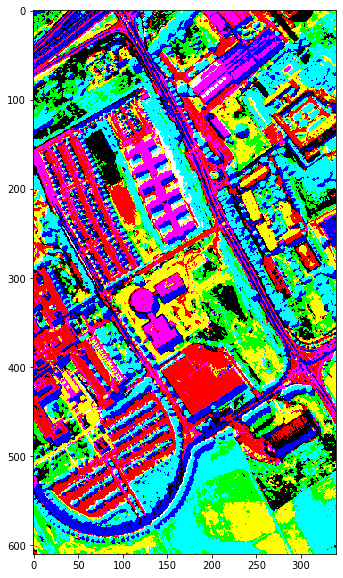

In [32]:
plt.figure(figsize=(20,10))
plt.imshow(paviaU_PCA*Nmax)

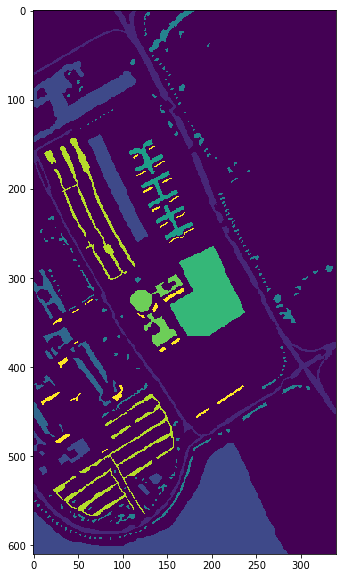

In [34]:
plt.figure(figsize=(20,10))
plt.imshow(paviaU_gt)

(array([164624.,   6631.,  18649.,   2099.,   3064.,   1345.,   5029.,
          1330.,   3682.,    947.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

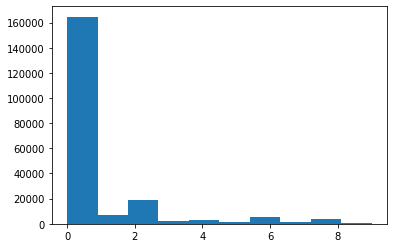

In [39]:
plt.hist(paviaU_gt.reshape((610*340)))

In [110]:
n_class,num_pre_class = np.unique(paviaU_gt.reshape((610*340)), return_counts=True)

In [513]:
df = pd.DataFrame(paviaU_PCA,paviaU_gt)
df = df.sample(frac=1)
df = df.sort_index()
df

,0,1,2
0,0.584086,-0.201520,-0.138628
0,0.081351,1.983862,0.256473
0,-0.365136,0.428319,0.101882
0,-0.061154,0.107463,-0.017625
0,0.297261,-0.012634,-0.300760
...,...,...,...
9,-1.261713,-1.049790,0.061896
9,-1.199608,-0.878901,0.109910
9,-1.332811,-1.015540,0.060156
9,-1.343770,-1.068965,0.060510


In [514]:
pd.value_counts(df.index)

0    164624
2     18649
1      6631
6      5029
8      3682
4      3064
3      2099
5      1345
7      1330
9       947
dtype: int64

In [515]:
num_pre_class[:2].sum()

171255

In [516]:
df.iloc[num_pre_class[:9].sum():num_pre_class[:9].sum()+200].head()

,0,1,2
9,-1.018852,-1.019727,0.101333
9,-1.250981,-0.939714,0.051105
9,-1.350449,-1.069182,0.042879
9,-1.298111,-1.038656,0.068949
9,-0.983466,-1.013936,0.121818


In [517]:
 n_class,num_pre_class

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([164624,   6631,  18649,   2099,   3064,   1345,   5029,   1330,
          3682,    947]))

In [540]:
ttc = [10000,500,500,200,200,100,400,100,200,90]

In [541]:
X_train = np.concatenate((df.iloc[0:ttc[0]],
                          df.iloc[num_pre_class[:1].sum():num_pre_class[:1].sum()+ttc[1]],
                          df.iloc[num_pre_class[:2].sum():num_pre_class[:2].sum()+ttc[2]],
                         df.iloc[num_pre_class[:3].sum():num_pre_class[:3].sum()+ttc[3]],
                         df.iloc[num_pre_class[:4].sum():num_pre_class[:4].sum()+ttc[4]],
                         df.iloc[num_pre_class[:5].sum():num_pre_class[:5].sum()+ttc[5]],
                         df.iloc[num_pre_class[:6].sum():num_pre_class[:6].sum()+ttc[6]],
                         df.iloc[num_pre_class[:7].sum():num_pre_class[:7].sum()+ttc[7]],
                         df.iloc[num_pre_class[:8].sum():num_pre_class[:8].sum()+ttc[8]],
                         df.iloc[num_pre_class[:9].sum():num_pre_class[:9].sum()+ttc[9]]))

y_train = np.concatenate(( np.zeros(ttc[0]) ,
                        np.ones(ttc[1]),
                        np.ones(ttc[2])*2,
                        np.ones(ttc[3])*3,
                        np.ones(ttc[4])*4,
                        np.ones(ttc[5])*5,
                        np.ones(ttc[6])*6,
                        np.ones(ttc[7])*7,
                        np.ones(ttc[8])*8,
                        np.ones(ttc[9])*9,))

X_test = np.concatenate((df.iloc[ttc[0]:num_pre_class[:1].sum()],
                        df.iloc[num_pre_class[:1].sum()+ttc[1]:num_pre_class[:2].sum()],
                        df.iloc[num_pre_class[:2].sum()+ttc[2]:num_pre_class[:3].sum()],
                        df.iloc[num_pre_class[:3].sum()+ttc[3]:num_pre_class[:4].sum()],
                        df.iloc[num_pre_class[:4].sum()+ttc[4]:num_pre_class[:5].sum()],
                        df.iloc[num_pre_class[:5].sum()+ttc[5]:num_pre_class[:6].sum()],
                        df.iloc[num_pre_class[:6].sum()+ttc[6]:num_pre_class[:7].sum()],
                        df.iloc[num_pre_class[:7].sum()+ttc[7]:num_pre_class[:8].sum()],
                        df.iloc[num_pre_class[:8].sum()+ttc[8]:num_pre_class[:9].sum()],
                        df.iloc[num_pre_class[:9].sum()+ttc[9]:]))
y_test = np.concatenate(( np.zeros(num_pre_class[0]-ttc[0]) ,
                        np.ones(num_pre_class[1]-ttc[1]),
                        np.ones(num_pre_class[2]-ttc[2])*2,
                        np.ones(num_pre_class[3]-ttc[3])*3,
                        np.ones(num_pre_class[4]-ttc[4])*4,
                        np.ones(num_pre_class[5]-ttc[5])*5,
                        np.ones(num_pre_class[6]-ttc[6])*6,
                        np.ones(num_pre_class[7]-ttc[7])*7,
                        np.ones(num_pre_class[8]-ttc[8])*8,
                        np.ones(num_pre_class[9]-ttc[9])*9,))


In [542]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12290, 3)
(12290,)
(195110, 3)
(195110,)


In [543]:
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train = y_train[idx]
idx = np.random.permutation(len(X_test))
X_test = X_test[idx]
y_test = y_test[idx]


In [544]:
from sklearn.metrics import classification_report

In [545]:
import xgboost as xgb

In [546]:
xgbc = xgb.XGBClassifier(max_depth=7,n_estimators=500)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [547]:
print(classification_report(y_test,xgbc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88    154624
         1.0       0.45      0.28      0.35      6131
         2.0       0.51      0.06      0.11     18149
         3.0       0.24      0.13      0.17      1899
         4.0       0.27      0.12      0.16      2864
         5.0       0.76      0.80      0.78      1245
         6.0       0.22      0.05      0.08      4629
         7.0       0.52      0.39      0.44      1230
         8.0       0.41      0.18      0.25      3482
         9.0       0.38      0.49      0.43       857

    accuracy                           0.79    195110
   macro avg       0.46      0.34      0.37    195110
weighted avg       0.74      0.79      0.74    195110



In [550]:
import lightgbm as lgbm

In [557]:
lgbc = lgbm.LGBMClassifier(learning_rate=0.1,n_estimators=500)
lgbc.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [558]:
print(classification_report(y_test,lgbc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87    154624
         1.0       0.43      0.33      0.37      6131
         2.0       0.46      0.09      0.15     18149
         3.0       0.21      0.20      0.21      1899
         4.0       0.24      0.13      0.17      2864
         5.0       0.77      0.77      0.77      1245
         6.0       0.20      0.08      0.12      4629
         7.0       0.48      0.37      0.42      1230
         8.0       0.40      0.23      0.29      3482
         9.0       0.37      0.47      0.41       857

    accuracy                           0.78    195110
   macro avg       0.44      0.36      0.38    195110
weighted avg       0.73      0.78      0.74    195110



In [566]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

In [564]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [565]:
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.88    154624
         1.0       0.49      0.28      0.36      6131
         2.0       0.58      0.05      0.09     18149
         3.0       0.27      0.12      0.17      1899
         4.0       0.31      0.08      0.13      2864
         5.0       0.76      0.83      0.80      1245
         6.0       0.26      0.04      0.07      4629
         7.0       0.54      0.40      0.46      1230
         8.0       0.45      0.18      0.26      3482
         9.0       0.44      0.44      0.44       857

    accuracy                           0.80    195110
   macro avg       0.49      0.34      0.36    195110
weighted avg       0.75      0.80      0.74    195110



In [575]:
esvc = VotingClassifier(estimators=[('xgb',xgbc),('lgb',lgbc),('rf',rfc)],voting='hard')

In [576]:
esvc.fit(X_train,y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=7, min_child_weight=1,
                                            missing=None, n_estimators=500,
                                            n_jobs=1, nthread=None,
                                            objective='multi:softprob',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=...
                                                     class_weight=None,
                                                     criterion='gini',
              

In [577]:
print(classification_report(y_test,esvc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88    154624
         1.0       0.48      0.29      0.36      6131
         2.0       0.56      0.06      0.10     18149
         3.0       0.25      0.13      0.18      1899
         4.0       0.30      0.09      0.13      2864
         5.0       0.77      0.82      0.79      1245
         6.0       0.25      0.05      0.08      4629
         7.0       0.54      0.38      0.45      1230
         8.0       0.43      0.18      0.26      3482
         9.0       0.44      0.47      0.45       857

    accuracy                           0.79    195110
   macro avg       0.48      0.34      0.37    195110
weighted avg       0.74      0.79      0.74    195110



In [581]:
esvc2 = VotingClassifier(estimators=[('xgb',xgbc),('lgb',lgbc),('rf',rfc)],voting='soft')
esvc2.fit(X_train,y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=7, min_child_weight=1,
                                            missing=None, n_estimators=500,
                                            n_jobs=1, nthread=None,
                                            objective='multi:softprob',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=...
                                                     class_weight=None,
                                                     criterion='gini',
              

In [582]:
print(classification_report(y_test,esvc2.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88    154624
         1.0       0.48      0.30      0.36      6131
         2.0       0.54      0.06      0.10     18149
         3.0       0.24      0.15      0.19      1899
         4.0       0.28      0.09      0.14      2864
         5.0       0.77      0.80      0.78      1245
         6.0       0.25      0.05      0.08      4629
         7.0       0.51      0.39      0.45      1230
         8.0       0.42      0.19      0.27      3482
         9.0       0.41      0.47      0.44       857

    accuracy                           0.79    195110
   macro avg       0.47      0.35      0.37    195110
weighted avg       0.74      0.79      0.74    195110



In [526]:
from sklearn.svm import SVC

In [531]:
svmc = SVC(C=5,cache_size=400)
svmc.fit(X_train,y_train)

/Users/layyer/anaconda3/envs/remote/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=5, cache_size=400, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [532]:
print(classification_report(y_test,svmc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.90      0.46      0.61    163624
         1.0       0.19      0.89      0.31      6131
         2.0       0.24      0.64      0.35     18149
         3.0       0.12      0.32      0.17      1899
         4.0       0.15      0.79      0.25      2864
         5.0       0.50      0.98      0.66      1245
         6.0       0.12      0.06      0.08      4629
         7.0       0.00      0.00      0.00      1230
         8.0       0.21      0.77      0.33      3482
         9.0       0.18      0.97      0.30       857

    accuracy                           0.49    204110
   macro avg       0.26      0.59      0.31    204110
weighted avg       0.76      0.49      0.54    204110



In [484]:
#X_train = X_train.reshape((3290,20,1))
#X_test = X_test.reshape((204110, 20,1))

In [485]:
from tensorflow import keras

In [533]:
y_train_encode = keras.utils.to_categorical(y_train)
y_test_encode = keras.utils.to_categorical(y_test)

In [534]:
def nnmodel(input_shape):
    X_input = keras.layers.Input((input_shape))
    X = keras.layers.Dense(1024,activation='relu')(X_input)
    X = keras.layers.Dense(128,activation='relu')(X)
    X = keras.layers.Dense(10,activation='softmax')(X)
    model = keras.models.Model(inputs=X_input, outputs=X, name='model')
    return model

In [535]:
mymodel = nnmodel(X_train[0].shape)
mymodel.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
mymodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        (None, 3)                 0         
_________________________________________________________________
dense_87 (Dense)             (None, 1024)              4096      
_________________________________________________________________
dense_88 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_89 (Dense)             (None, 10)                1290      
Total params: 136,586
Trainable params: 136,586
Non-trainable params: 0
_________________________________________________________________


In [536]:
mymodel.fit(X_train,y_train_encode,batch_size=32,epochs=100,validation_data=(X_test[:200],y_test_encode[:200]))

Train on 3290 samples, validate on 200 samples
Epoch 1/100
3290/3290 [==============================] - 2s 590us/sample - loss: 1.4053 - acc: 0.4474 - val_loss: 1.1324 - val_acc: 0.4450
Epoch 2/100
3290/3290 [==============================] - 1s 202us/sample - loss: 1.0611 - acc: 0.5149 - val_loss: 1.0618 - val_acc: 0.4500
Epoch 3/100
3290/3290 [==============================] - 1s 195us/sample - loss: 1.0177 - acc: 0.5261 - val_loss: 1.0333 - val_acc: 0.5250
Epoch 4/100
3290/3290 [==============================] - 1s 190us/sample - loss: 0.9861 - acc: 0.5517 - val_loss: 1.0503 - val_acc: 0.4750
Epoch 5/100
3290/3290 [==============================] - 1s 190us/sample - loss: 0.9782 - acc: 0.5404 - val_loss: 0.9407 - val_acc: 0.5850
Epoch 6/100
3290/3290 [==============================] - 1s 191us/sample - loss: 0.9656 - acc: 0.5629 - val_loss: 0.9509 - val_acc: 0.5450
Epoch 7/100
3290/3290 [==============================] - 1s 193us/sample - loss: 0.9519 - acc: 0.5690 - val_loss: 1.019

3290/3290 [==============================] - 1s 235us/sample - loss: 0.7933 - acc: 0.6450 - val_loss: 0.8987 - val_acc: 0.4950
Epoch 60/100
3290/3290 [==============================] - 1s 223us/sample - loss: 0.7874 - acc: 0.6538 - val_loss: 0.9676 - val_acc: 0.4800
Epoch 61/100
3290/3290 [==============================] - 1s 218us/sample - loss: 0.7900 - acc: 0.6517 - val_loss: 1.0350 - val_acc: 0.4600
Epoch 62/100
3290/3290 [==============================] - 1s 240us/sample - loss: 0.7856 - acc: 0.6532 - val_loss: 0.8890 - val_acc: 0.5150
Epoch 63/100
3290/3290 [==============================] - 1s 228us/sample - loss: 0.7808 - acc: 0.6547 - val_loss: 0.9585 - val_acc: 0.4950
Epoch 64/100
3290/3290 [==============================] - 1s 227us/sample - loss: 0.7839 - acc: 0.6483 - val_loss: 0.9444 - val_acc: 0.4750
Epoch 65/100
3290/3290 [==============================] - 1s 238us/sample - loss: 0.7838 - acc: 0.6529 - val_loss: 0.8737 - val_acc: 0.5200
Epoch 66/100
3290/3290 [=========

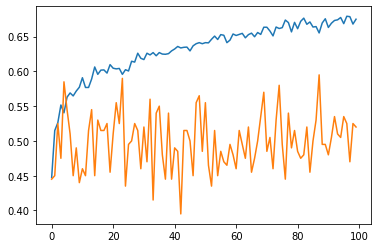

In [537]:
his = mymodel.history.history
plt.plot(his['acc'])
plt.plot(his['val_acc'])

In [538]:
pred = mymodel.predict(X_test)

In [539]:
print(classification_report(y_test,np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

         0.0       0.94      0.52      0.67    163624
         1.0       0.23      0.83      0.37      6131
         2.0       0.34      0.73      0.46     18149
         3.0       0.17      0.69      0.28      1899
         4.0       0.21      0.65      0.32      2864
         5.0       0.57      0.99      0.72      1245
         6.0       0.11      0.52      0.18      4629
         7.0       0.45      0.68      0.54      1230
         8.0       0.35      0.58      0.44      3482
         9.0       0.19      0.97      0.32       857

    accuracy                           0.56    204110
   macro avg       0.36      0.72      0.43    204110
weighted avg       0.81      0.56      0.62    204110



In [583]:
from sklearn.metrics import confusion_matrix,cohen_kappa_score

In [584]:
cohen_kappa_score(y_test,pred)

ValueError: Found input variables with inconsistent numbers of samples: [195110, 204110]